In [61]:
import numpy as np

def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)

	return 1/(1+np.exp(-x))
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1],
             [1,1,0]])
                
y = np.array([[0],
			[1],
			[1],
			[0],
             [1]])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

for j in xrange(5000):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    #print "l1:" + str(l1)
    #print "l2:" + str(l2)

    # how much did we miss the target value?
    l2_error = y - l2
    #print "l2error:" + str(l2_error)
    
    if (j% 1000) == 0:
        print "Error:" + str(np.mean(np.abs(l2_error)))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)
    #print "l2 delta:" + str(l2_delta)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    #print "l1 error:" + str(l1_error)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
    #print "l1 delta:" + str(l1_delta)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    #print "syn1:" + str(syn1)
    #print "syn0:" + str(syn0)

print "Result:" + str(l2)

Error:0.492557633304
Error:0.0378782593769
Error:0.0223658718532
Error:0.0170670345713
Error:0.0142312403483
Result:[[ 0.00537745]
 [ 0.98813741]
 [ 0.98571616]
 [ 0.021527  ]
 [ 0.9909729 ]]


In [10]:
r = np.array([[1],[2]])
s = np.array([[1,3]])
r * s

array([[1, 3],
       [2, 6]])

In [3]:
import numpy as np
r = np.array([[1],[2]])
s = np.array([[1,3]])
print r.dot(s)
print r*s

[[1 3]
 [2 6]]
[[1 3]
 [2 6]]


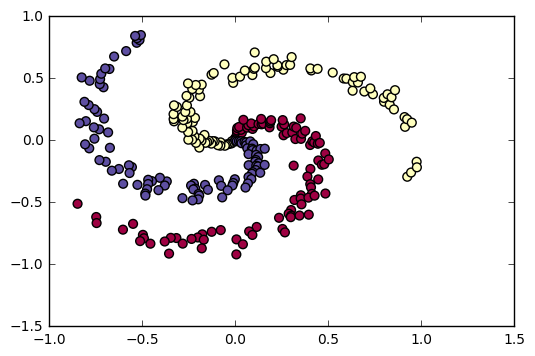

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [15]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.095371
iteration 10: loss 0.903844
iteration 20: loss 0.832678
iteration 30: loss 0.800324
iteration 40: loss 0.783487
iteration 50: loss 0.773918
iteration 60: loss 0.768142
iteration 70: loss 0.764503
iteration 80: loss 0.762138
iteration 90: loss 0.760562
iteration 100: loss 0.759493
iteration 110: loss 0.758757
iteration 120: loss 0.758244
iteration 130: loss 0.757883
iteration 140: loss 0.757628
iteration 150: loss 0.757445
iteration 160: loss 0.757314
iteration 170: loss 0.757219
iteration 180: loss 0.757151
iteration 190: loss 0.757101


In [16]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.52


In [1]:
# initialize parameters randomly
h = 150 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

NameError: name 'np' is not defined

In [12]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.99


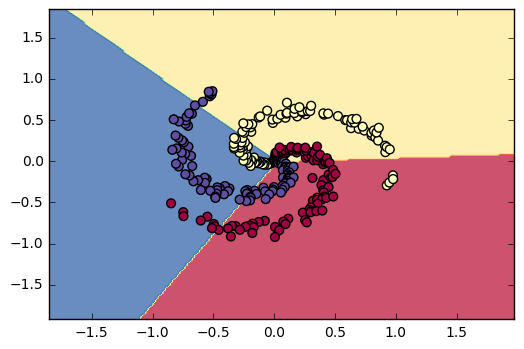

In [17]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()
#fig.savefig('spiral_linear.png')

In [58]:
import numpy as np
exp_tst = np.exp([[1,2,3,4,5]])
print exp_tst
probs = exp_tst / np.sum(exp_tst, axis=1, keepdims=True)
print probs
print probs[0,2]
print probs[range(1),[[3]]]

[[   2.71828183    7.3890561    20.08553692   54.59815003  148.4131591 ]]
[[ 0.01165623  0.03168492  0.08612854  0.23412166  0.63640865]]
0.0861285444363
[[ 0.23412166]]


In [60]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
for j in xrange(60000):
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)
print l2

[[ 0.00231155]
 [ 0.99695301]
 [ 0.99631803]
 [ 0.00404382]]


In [2]:
import numpy as np

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    if(abs(x).any>10):
        return np.sign(x)
    return 1/(1+np.exp(-x))

wij = np.array([[0.2,0.1],
             [0.1,0.3]])
                
y = np.array([[0.6]])

aj = np.array([[2], [1]])

wi = np.array([[1], [1]])

xi = wij * aj
x = wi * nonlin(xi, False)

E = 1/2 * (nonlin(x, False) - y)**2

print xi
print x

dEdw = (nonlin(x, False) - y)*nonlin(x, True)*wi*nonlin(xi, True)*aj

print E

alpha = 1

dwij = -alpha * dEdw

print dwij

[[ 0.4  0.2]
 [ 0.1  0.3]]
[[ 0.59868766  0.549834  ]
 [ 0.52497919  0.57444252]]
[[ 0.  0.]
 [ 0.  0.]]
[[-0.00523069 -0.00270067]
 [-0.00063542 -0.00204255]]


In [98]:
import numpy as np

# input a_k -- Wkj -- g(in_j) -  hidden a_j -- Wji -- g(in_i) - output a_i - y_i
# hidden to output layer
# Wji = Wji + alpha (yi-ai)g'(ini)aj ini=sum over j Wji aj
# input to hidden layer
# Wkj = Wkj + alpha sum over i (yi-ai) Wji g'(inj) ak inj = sum over k Wkj ak

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

alpha = 1
yi = np.array([[0.6], [0.2]])
ai = np.array([[0.3], [0.2]])
aj = np.array([[0.3], [-0.2]])
wji = np.array([[0.2,0.1],
             [0.1,0.3]]) 
ini = wji * aj
print wji + alpha * (yi-ai) * sigmoid(ini,True) * aj
ak = np.array([[0.4], [-0.1]])
wkj = np.array([[0.1,-0.1],
             [0.1,0.2]]) 
inj = wkj * ak
print wkj + alpha * (yi-ai) * wji * sigmoid(inj,True) * ak

yi = np.array([[0.5], [0.1]])
ai = np.array([[0.3], [0.2]])
aj = np.array([[0.3], [-0.2]]) 
ini = wji * aj
print wji + alpha * (yi-ai) * sigmoid(ini,True) * aj
ak = np.array([[0.4], [-0.1]]) 
inj = wkj * ak
print wkj + alpha * (yi-ai) * wji * sigmoid(inj,True) * ak

yi = np.array([[0.5], [0.1]])
ai = np.array([[0.3], [0.2]])
aj = np.array([[0.3], [-0.2]]) 
ini = wji * aj
print wji + alpha * (yi-ai) * sigmoid(ini,True) * aj
ak = np.array([[0.4], [-0.1]]) 
inj = wkj * ak
print wkj + alpha * (yi-ai) * wji * sigmoid(inj,True) * ak

yi = np.array([[0.5], [0.1]])
ai = np.array([[0.3], [0.2]])
aj = np.array([[0.3], [-0.2]]) 
ini = wji * aj
print wji + alpha * (-yi * np.log(ai)) * sigmoid(ini,True) * aj
ak = np.array([[0.4], [-0.1]]) 
inj = wkj * ak
print wkj + alpha * (-yi * np.log(ai)) * wji * sigmoid(inj,True) * ak

[[ 0.205  0.103]
 [ 0.1    0.3  ]]
[[ 0.101 -0.1  ]
 [ 0.1    0.2  ]]
[[ 0.203  0.102]
 [ 0.1    0.299]]
[[ 0.101 -0.1  ]
 [ 0.1    0.2  ]]
[[ 0.203  0.102]
 [ 0.1    0.299]]
[[ 0.101 -0.1  ]
 [ 0.1    0.2  ]]
[[ 0.21   0.105]
 [ 0.101  0.302]]
[[ 0.102 -0.101]
 [ 0.1    0.2  ]]


In [13]:
import numpy as np

# input a_k -- Wkj -- g(in_j) -  hidden a_j -- Wji -- g(in_i) - output a_i - y_i
# hidden to output layer
# Wji = Wji + alpha (yi-ai)g'(ini)aj ini=sum over j Wji aj
# input to hidden layer
# Wkj = Wkj + alpha sum over i (yi-ai) Wji g'(inj) ak inj = sum over k Wkj ak

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    np.putmask(x, x > 100, 100) # limit array values of x (np.putmask(a, a >= m, m - 1))
    np.putmask(x, x < -100, -100)
    return 1/(1+np.exp(-x))

alpha = 1
# solid = 1111, vertical = 1010 or 0101, diagonal = 1001 or 0110, horizontal = 1100 or 0011
# bias as last element
solid = np.array([[1,1,1,1]]) # solid = 1111
vert0 = np.array([[1,0,1,0]]) # vertical = 1010
vert1 = np.array([[0,1,0,1]]) # vertical = 0101
diag0 = np.array([[1,0,0,1]]) # diagonal = 1001
diag1 = np.array([[0,1,1,0]]) # diagonal = 0110
hor0 = np.array([[1,1,0,0]]) # horizontal = 1100
hor1 = np.array([[0,0,1,1]]) # horizontal = 0011

# target outputs
tsol = np.array([[1,0,0,0]]) # solid
tvert = np.array([[0,1,0,0]]) # vertical
tdiag = np.array([[0,0,1,0]]) # diagonal
thor = np.array([[0,0,0,1]]) # horizontal

wji = np.array([[-0.2,0.1,0.1,0.1],
                [0.1,0.1,-0.1,0.1],
                [-0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1]])
wkj = np.array([[0.1,0.1,0.1,0.1],
                [0.1,0.2,-0.1,-0.1],
                [-0.1,-0.1,0.1,0.1],
                [0.2,0.1,0.2,0.1]])

np.set_printoptions(precision=3)

for i in xrange(10):
    ak = solid
    yi = tsol
    inj = np.dot(ak,wkj)
    aj = sigmoid(inj,False)
    ini = np.dot(aj,wji)
    ai = sigmoid(ini,False)
    deltai = (yi-ai) * sigmoid(ini,True)
    wji += alpha * aj.T * deltai # Wji += alpha (yi-ai)g'(ini)aj 
    wkj += alpha * np.dot(ak.T,np.dot(sigmoid(inj,True),np.dot(wji,deltai.T))) # Wkj += alpha ak g'(inj) sum i Wji(yi-ai)

# see if its working: predicted class correct?
ak = solid
inj = np.dot(ak,wkj)
aj = sigmoid(inj,False)
ini = np.dot(aj,wji)
ai = sigmoid(ini,False)
print ai

[[ 0.5  0.5  0.5  0.5]]


In [10]:
a = np.array([[0], [1]])
b = np.array([[0,1], [2,3]])
x1 = a.T.dot(b)
print x1
c = np.array([[1], [2]])
d = np.array([[2,2], [3,2]])
x2 = c.T.dot(d)

print np.dot(b,d)

print b * d

print b
b[1, :] = 3 # Assing to second row
print b
b[:, 1] = 4 # Assing to second column
print b

#[0] #means line 0 of your matrix
#[(0,0)] #means cell at 0,0 of your matrix
#[0:1] #means lines 0 to 1 excluded of your matrix
#[:1] #excluding the first value means all lines until line 1 excluded
#[1:] #excluding the last param mean all lines starting form line 1 included
#[:] #excluding both means all lines
#[::2] #the addition of a second ':' is the sampling. (1 item every 2)
#[::] #exluding it means a sampling of 1
#[:,:] #simply uses a tuple (a single , represents an empty tuple) instead of an index.

[[2 3]]
[[ 3  2]
 [13 10]]
[[0 2]
 [6 6]]
[[0 1]
 [2 3]]
[[0 1]
 [3 3]]
[[0 4]
 [3 4]]


In [3]:
import numpy as np

# input a_k -- Wkj -- g(in_j) -  hidden a_j -- Wji -- g(in_i) - output a_i - y_i
# hidden to output layer
# Wji = Wji + alpha (yi-ai)g'(ini)aj      ini=sum over j Wji aj
# input to hidden layer
# Wkj = Wkj + alpha sum over i (yi-ai) Wji g'(inj) ak      inj = sum over k Wkj ak

np.set_printoptions(precision=4)

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    np.putmask(x, x > 100, 100) # limit array values of x (np.putmask(a, a >= m, m - 1))
    np.putmask(x, x < -100, -100)
    return 1/(1+np.exp(-x))

alpha = 1
# solid = 11, vertical = 10 or 01, horizontal = 11
solid = np.array([[1,1]]) # solid = 11
half0 = np.array([[1,0]]) # 50% = 10
half1 = np.array([[0,1]]) # 50% = 01
empty = np.array([[0,0]]) # empty = 00

# target outputs
tsol = np.array([[1,0]]) # solid
thal = np.array([[0,1]]) # half
tempt = np.array([[0,0]]) # empty

wji = np.array([[0.1,0.1],
                [0.1,0.1]])
wkj = np.array([[0.1,0.1],
                [0.1,0.1]])

ak = solid
yi = tsol
for i in xrange(20):
    inj = np.dot(ak,wkj)
    aj = sigmoid(inj,False)
    ini = np.dot(aj,wji)
    ai = sigmoid(ini,False)
    deltai = (yi-ai) * sigmoid(ini,True)
    wji += alpha * aj.T * deltai # Wji += alpha (yi-ai)g'(ini)aj 
    wkj += alpha * np.dot(ak.T,np.dot(sigmoid(inj,True),np.dot(wji,deltai.T))) # Wkj += alpha ak g'(inj) sum i Wji(yi-ai)

#print wji
#print wkj

# test - see if its working: predicted class correct?
ak = solid
inj = np.dot(ak,wkj)
aj = sigmoid(inj,False)
ini = np.dot(aj,wji)
ai = sigmoid(ini,False)
print ai

[[ 0.7311  0.5   ]]


In [14]:
import numpy as np

# input a_k -- Wkj -- g(in_j) -  hidden a_j -- Wji -- g(in_i) - output a_i - y_i
# hidden to output layer
# Wji = Wji + alpha (yi-ai)g'(ini)aj ini=sum over j Wji aj
# input to hidden layer
# Wkj = Wkj + alpha sum over i (yi-ai) Wji g'(inj) ak inj = sum over k Wkj ak

np.set_printoptions(precision=3)

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    np.putmask(x, x > 100, 100) # limit array values of x (np.putmask(a, a >= m, m - 1))
    np.putmask(x, x < -100, -100)
    return 1/(1+np.exp(-x))

alpha = 1
# example 20.15 from Russel/Norvig: 6 examples, 14 inputs, 14 outputs 
I1 = np.array([[1,1,1,1,1,1,1,0,0,0,0,0,0,0]])
I2 = np.array([[0,0,0,1,1,0,0,1,1,0,1,0,1,1]])
I3 = np.array([[1,1,1,0,1,0,0,1,1,0,0,0,1,1]])
I4 = np.array([[0,1,0,0,1,0,0,1,0,1,1,1,0,1]])
I5 = np.array([[0,0,1,1,0,1,1,0,1,1,0,0,1,0]])
I6 = np.array([[0,0,0,1,0,1,0,1,1,0,1,1,1,0]])

tout = np.array([[1,1,1,1,1,1,0,1,0,0,0,0,0,0]])

wji = np.array([[0.2,-0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]])
wkj = np.array([[0.2,-0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]])

yi=tout

for i in xrange(1):
    ak = I1 # input
    inj = np.dot(ak,wkj)
    aj = sigmoid(inj,False)
    ini = np.dot(aj,wji)
    ai = sigmoid(ini,False)
    deltai = (yi-ai) * sigmoid(ini,True)
    wji += alpha * aj.T * deltai # Wji += alpha (yi-ai)g'(ini)aj 
    wkj += alpha * np.dot(ak.T,np.dot(sigmoid(inj,True),np.dot(wji,deltai.T))) # Wkj += alpha ak g'(inj) sum i Wji(yi-ai)

for i in xrange(1):
    ak = I2 # input
    inj = np.dot(ak,wkj)
    aj = sigmoid(inj,False)
    ini = np.dot(aj,wji)
    ai = sigmoid(ini,False)
    deltai = (yi-ai) * sigmoid(ini,True)
    wji += alpha * aj.T * deltai # Wji += alpha (yi-ai)g'(ini)aj 
    wkj += alpha * np.dot(ak.T,np.dot(sigmoid(inj,True),np.dot(wji,deltai.T))) # Wkj += alpha ak g'(inj) sum i Wji(yi-ai)

for i in xrange(1):
    ak = I3 # input
    inj = np.dot(ak,wkj)
    aj = sigmoid(inj,False)
    ini = np.dot(aj,wji)
    ai = sigmoid(ini,False)
    deltai = (yi-ai) * sigmoid(ini,True)
    wji += alpha * np.dot(aj.T, deltai) # Wji += alpha (yi-ai)g'(ini)aj 
    wkj += alpha * np.dot(ak.T,np.dot(sigmoid(inj,True),np.dot(wji,deltai.T))) # Wkj += alpha ak g'(inj) sum i Wji(yi-ai)

for i in xrange(1):
    ak = I4 # input
    inj = np.dot(ak,wkj)
    aj = sigmoid(inj,False)
    ini = np.dot(aj,wji)
    ai = sigmoid(ini,False)
    deltai = (yi-ai) * sigmoid(ini,True)
    wji += alpha * aj.T * deltai # Wji += alpha (yi-ai)g'(ini)aj 
    wkj += alpha * np.dot(ak.T,np.dot(sigmoid(inj,True),np.dot(wji,deltai.T))) # Wkj += alpha ak g'(inj) sum i Wji(yi-ai)

for i in xrange(1):
    ak = I5 # input
    inj = np.dot(ak,wkj)
    aj = sigmoid(inj,False)
    ini = np.dot(aj,wji)
    ai = sigmoid(ini,False)
    deltai = (yi-ai) * sigmoid(ini,True)
    wji += alpha * aj.T * deltai # Wji += alpha (yi-ai)g'(ini)aj 
    wkj += alpha * np.dot(ak.T,np.dot(sigmoid(inj,True),np.dot(wji,deltai.T))) # Wkj += alpha ak g'(inj) sum i Wji(yi-ai)

for i in xrange(1):
    ak = I6 # input
    inj = np.dot(ak,wkj)
    aj = sigmoid(inj,False)
    ini = np.dot(aj,wji)
    ai = sigmoid(ini,False)
    deltai = (yi-ai) * sigmoid(ini,True)
    wji += alpha * aj.T * deltai # Wji += alpha (yi-ai)g'(ini)aj 
    wkj += alpha * np.dot(ak.T,np.dot(sigmoid(inj,True),np.dot(wji,deltai.T))) # Wkj += alpha ak g'(inj) sum i Wji(yi-ai)

#print wji
#print wkj

# test - see if its working: predicted class correct?
ak = tout # input
inj = np.dot(ak,wkj)
aj = sigmoid(inj,False)
ini = np.dot(aj,wji)
ai = sigmoid(ini,False)
print yi
print ai

[[1 1 1 1 1 1 0 1 0 0 0 0 0 0]]
[[ 0.537  0.536  0.537  0.537  0.537  0.537  0.573  0.537  0.573  0.573
   0.573  0.573  0.573  0.573]]


In [43]:
import numpy as np
from math import exp

# input a_k -- Wkj -- g(in_j) -  hidden a_j -- Wji -- g(in_i) - output a_i - y_i
# hidden to output layer
# Wji = Wji + alpha (yi-ai)g'(ini)aj      ini=sum over j Wji aj
# input to hidden layer
# Wkj = Wkj + alpha sum over i (yi-ai) Wji g'(inj) ak      inj = sum over k Wkj ak

np.set_printoptions(precision=4)

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    np.putmask(x, x > 100, 100) # limit array values of x (np.putmask(a, a >= m, m - 1))
    np.putmask(x, x < -100, -100)
    return 1/(1+np.exp(-x))

def sig(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+exp(-x))

alpha = 1
# solid = 11, vertical = 10 or 01, horizontal = 11
solid = np.array([[1,1]]) # solid = 11
half0 = np.array([[1,0]]) # 50% = 10
half1 = np.array([[0,1]]) # 50% = 01
empty = np.array([[0,0]]) # empty = 00

# target outputs
tsol = np.array([[1,0]]) # solid
thal = np.array([[0,1]]) # half
tempt = np.array([[0,0]]) # empty

#wji = np.array([[0.1,0.1],
#                [0.1,0.1]])
#wkj = np.array([[0.1,0.1],
#                [0.1,0.1]])

wji00 = 0.1
wji10 = 0.1
wji01 = 0.1
wji11 = 0.1

wkj00 = 0.1
wkj10 = 0.1
wkj01 = 0.1
wkj11 = 0.1

for i in xrange(20):
    ak0 = 1
    ak1 = 1
    yi0 = 1
    yi1 = 0
    #inj = np.dot(ak,wkj)
    inj0 = ak0 * wkj00 + ak1 * wkj10
    inj1 = ak0 * wkj01 + ak1 * wkj11
    #aj = sigmoid(inj,False)
    aj0 = sig(inj0,False)
    aj1 = sig(inj1,False)
    #ini = np.dot(aj,wji)
    ini0 = aj0 * wji00 + aj1 * wji10
    ini1 = aj0 * wji01 + aj1 * wji11
    #ai = sigmoid(ini,False)
    ai0 = sig(ini0,False)
    ai1 = sig(ini1,False)
    #deltai = (yi-ai) * sigmoid(ini,True)
    deltai0 = (yi0-ai0) * sig(ini0,True)
    deltai1 = (yi1-ai1) * sig(ini1,True)
    # Wji += alpha aj (yi-ai)g'(ini)
    wji00 += alpha * aj0 * deltai0
    wji10 += alpha * aj1 * deltai0
    wji01 += alpha * aj0 * deltai1
    wji11 += alpha * aj1 * deltai1
    # Wkj += alpha ak g'(inj) sum i Wji(yi-ai)
    wkj00 += alpha * ak0 * sig(inj0,True) * (wji00 * deltai0 + wji01 * deltai1) 
    wkj10 += alpha * ak1 * sig(inj0,True) * (wji00 * deltai0 + wji01 * deltai1)
    wkj01 += alpha * ak0 * sig(inj1,True) * (wji10 * deltai0 + wji11 * deltai1)
    wkj11 += alpha * ak1 * sig(inj1,True) * (wji10 * deltai0 + wji11 * deltai1)    
    #print wji
    #print wkj

#print wji
#print wkj

# test - see if its working: predicted class correct?
ak0 = 1
ak1 = 1
#inj = np.dot(ak,wkj)
inj0 = ak0 * wkj00 + ak1 * wkj10
inj1 = ak0 * wkj01 + ak1 * wkj11
#aj = sigmoid(inj,False)
aj0 = sig(inj0,False)
aj1 = sig(inj1,False)
#ini = np.dot(aj,wji)
ini0 = aj0 * wji00 + aj1 * wji10
ini1 = aj0 * wji01 + aj1 * wji11
#ai = sigmoid(ini,False)
ai0 = sig(ini0,False)
ai1 = sig(ini1,False)
print ai0
print ai1

0.723380686503
0.50001098107
